*CAWA Crop Type dataset is used according to the License Notice of the respective open source article uploaded on the nature.com website*

Remelgado, R., Zaitov, S., Kenjabaev, S., Stulina, G., Sultanov, M., Ibrakhimov, M., Akhmedov, M., Dukhovny, V., & Conrad, C. (2020). A crop type dataset for consistent land cover classification in Central Asia. Scientific Data, 7(1), 250. https://doi.org/10.1038/s41597-020-00591-2

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pyreadr

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/user/crop-detection/.venv/lib/python3.12/site-packages/zmq/eventloop/zmqstream.py", line 565, in _log_error
    f.result()
  File "/home/user/crop-detection/.venv/lib/python3.12/site-packages/ipykernel/kernelbase.py", line 577, in shell_channel_thread_main
    _, msg2 = self.session.feed_identities(msg, copy=False)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/user/crop-detection/.venv/lib/python3.12/site-packages/jupyter_client/session.py", line 994, in feed_identities
    raise ValueError(msg)
ValueError: DELIM not in msg_list
ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/user/crop-detection/.venv/lib/python3.12/site-packages/zmq/eventloop/zmqstream.py", line 565, in _log_error
    f.result()
  File "/home/user/crop-detection/.venv/lib/python3.12/site-packages/ipykernel/kernelbase.

In [2]:
STAC_SERVICE_URL = "https://earth-search.aws.element84.com/v1"
COLLECTION = ['sentinel-2-l2a']
PLATFORM = "sentinel-2b"
RES_10M_BANDS = ["blue", "green", "red", "nir"]
RES_20M_BANDS = ["rededge1", "rededge2", "rededge3", "nir08", "swir16", "swir22"]


In [3]:
cawa_samples_path = "./CAWA_CropType/CAWa_CropType_samples.shp"

gdf = gpd.read_file(cawa_samples_path)
gdf.head()

,sampler,country,region,date,year,label_1,label_2,area,geometry
0,SIC-ICWC,Uzbekistan,Fergana,2011-06-14,2011,cotton,summer,159710.395957,"POLYGON ((71.53066 40.49702, 71.53303 40.49595..."
1,SIC-ICWC,Uzbekistan,Fergana,2011-06-14,2011,cotton,summer,193109.525223,"POLYGON ((71.54027 40.49276, 71.5452 40.49053,..."
2,SIC-ICWC,Uzbekistan,Fergana,2011-06-14,2011,cotton,summer,70290.481564,"POLYGON ((71.54803 40.49244, 71.55068 40.49121..."
3,SIC-ICWC,Uzbekistan,Fergana,2011-06-14,2011,wheat-other,double,86003.121742,"POLYGON ((71.54542 40.4904, 71.54849 40.48905,..."
4,SIC-ICWC,Uzbekistan,Fergana,2011-06-14,2011,cotton,summer,168024.789200,"POLYGON ((71.55015 40.48437, 71.55099 40.48417..."


In [4]:
gdf.label_2.value_counts()

label_2
summer       4323
double       1925
winter       1596
permanent     407
fallow        128
unclear        56
Name: count, dtype: int64

In [47]:
(
    gdf
    .groupby(by=['label_2', 'label_1'])
    .agg({"sampler": 'count'})
)

sampler
label_2   label_1                  
double    alfalfa-maize           1
          cabbages-maize          1
          rice-vegetables         3
          vegetables-maize        2
          wheat-barley            1
          wheat-beans             1
          wheat-broom            11
          wheat-carrot            2
          wheat-carrots           1
          wheat-cotton            2
          wheat-maize           137
          wheat-melons            1
          wheat-other          1402
          wheat-rice            314
          wheat-sorghum          11
          wheat-soy               1
          wheat-vegetables       34
fallow    fallow                128
permanent alfalfa               121
          orchard               234
          vineyard               52
summer    cotton               4025
          cotton-other            1
          cotton-rice             1
          maize                 126
          onions-maize            1
          potato-maize            2
          rice                  167
unclear   beans                   2
          carrots                 3
          melons                  9
          oats                    1
          onions                  2
          potatoes                2
          pumpkin                 1
          soy                     1
          sunflower               2
          tomatoes                1
          vegetables             32
winter    wheat                1596

In [5]:
ndvi_time_series = pd.read_csv('./CAWA_CropType/CAWa_CropType_time-series.csv')
ndvi_time_series.head()

,1,17,33,49,65,81,97,113,129,145,...,209,225,241,257,273,289,305,321,337,353
0,0.111308,0.054765,0.126200,0.159484,0.166125,0.194259,0.243695,0.259268,0.412404,0.343718,...,0.461741,0.514291,0.600257,0.553822,0.447369,0.348610,0.359735,0.317485,0.285898,0.216978
1,0.126651,0.090735,0.149641,0.184197,0.163872,0.220546,0.291021,0.316314,0.404704,0.367779,...,0.530132,0.589395,0.645571,0.624038,0.490106,0.378392,0.363847,0.290808,0.286735,0.220190
2,0.147239,0.137748,0.149291,0.176259,0.158478,0.173498,0.223782,0.259900,0.287752,0.323776,...,0.551144,0.611123,0.670320,0.637986,0.482977,0.332352,0.363191,0.306088,0.329455,0.267669
3,0.156130,0.155003,0.195465,0.217602,0.198143,0.195593,0.358476,0.404701,0.491424,0.510285,...,0.552242,0.567723,0.558523,0.455200,0.338860,0.324740,0.356131,0.314149,0.356384,0.304119
4,0.108603,0.087930,0.121513,0.150245,0.146230,0.147424,0.158290,0.295771,0.290800,0.308931,...,0.582848,0.631126,0.680936,0.614774,0.461521,0.343801,0.362938,0.303859,0.281202,0.229455


In [6]:
ndvi_time_series.describe()

,1,17,33,49,65,81,97,113,129,145,...,209,225,241,257,273,289,305,321,337,353
count,5113.000000,5075.000000,4253.000000,4854.000000,4698.000000,5099.000000,4448.000000,4897.000000,4931.000000,6211.000000,...,8434.000000,8432.000000,8393.000000,8394.000000,8242.000000,7270.000000,7264.000000,4614.000000,4411.000000,3977.000000
mean,0.193168,0.186573,0.126123,0.154597,0.178636,0.199143,0.277396,0.321595,0.356935,0.367889,...,0.400319,0.473429,0.510182,0.498168,0.445485,0.416358,0.310985,0.246353,0.201176,0.158725
std,0.100786,0.096262,0.098709,0.112207,0.129823,0.178391,0.221935,0.227499,0.222773,0.215777,...,0.198266,0.216161,0.209838,0.190119,0.171975,0.187744,0.154085,0.126813,0.104662,0.099615
min,-0.003661,0.001180,-0.294324,-0.189859,-0.072905,-0.157720,-0.186826,-0.068105,0.012517,-0.028675,...,-0.256669,-0.138451,-0.073009,-0.295070,-0.044385,-0.057497,-0.058916,-0.100104,-0.223179,-0.145664
25%,0.117953,0.113549,0.069618,0.083708,0.092630,0.086581,0.113021,0.135312,0.162443,0.179138,...,0.231365,0.272179,0.323133,0.363223,0.332418,0.277221,0.199642,0.161876,0.127268,0.081860
50%,0.179212,0.169351,0.108219,0.121456,0.129384,0.129506,0.175272,0.218580,0.265324,0.308069,...,0.385938,0.509412,0.567967,0.536816,0.464980,0.398199,0.285332,0.230442,0.186372,0.147912
75%,0.259668,0.247580,0.170555,0.198627,0.218149,0.248115,0.415455,0.511519,0.551448,0.539359,...,0.566606,0.666126,0.684280,0.640927,0.559484,0.534044,0.383096,0.302268,0.252452,0.217368
max,0.688732,0.690521,0.602146,0.708217,0.717711,0.842652,0.970670,0.883994,0.999507,0.997399,...,0.918793,0.949354,0.999239,0.997135,0.987128,0.995401,0.982097,0.898135,0.790030,0.735471


In [7]:
full_gdf = gdf.join(ndvi_time_series)
full_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8435 entries, 0 to 8434
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   sampler   8435 non-null   object  
 1   country   8435 non-null   object  
 2   region    8435 non-null   object  
 3   date      8435 non-null   object  
 4   year      8435 non-null   object  
 5   label_1   8435 non-null   object  
 6   label_2   8435 non-null   object  
 7   area      8435 non-null   float64 
 8   geometry  8435 non-null   geometry
 9   1         5113 non-null   float64 
 10  17        5075 non-null   float64 
 11  33        4253 non-null   float64 
 12  49        4854 non-null   float64 
 13  65        4698 non-null   float64 
 14  81        5099 non-null   float64 
 15  97        4448 non-null   float64 
 16  113       4897 non-null   float64 
 17  129       4931 non-null   float64 
 18  145       6211 non-null   float64 
 19  161       8129 non-null   float64 
 20  

In [8]:
full_gdf.year.value_counts()

year
2016    4069
2018    2488
2015    1299
2017     340
2011     213
2008      26
Name: count, dtype: int64

In [15]:
import re

# Extract only numeric day columns
day_cols = sorted([int(c) for c in full_gdf.columns if re.fullmatch(r"\d+", c)])
day_cols

[1,
 17,
 33,
 49,
 65,
 81,
 97,
 113,
 129,
 145,
 161,
 177,
 193,
 209,
 225,
 241,
 257,
 273,
 289,
 305,
 321,
 337,
 353]

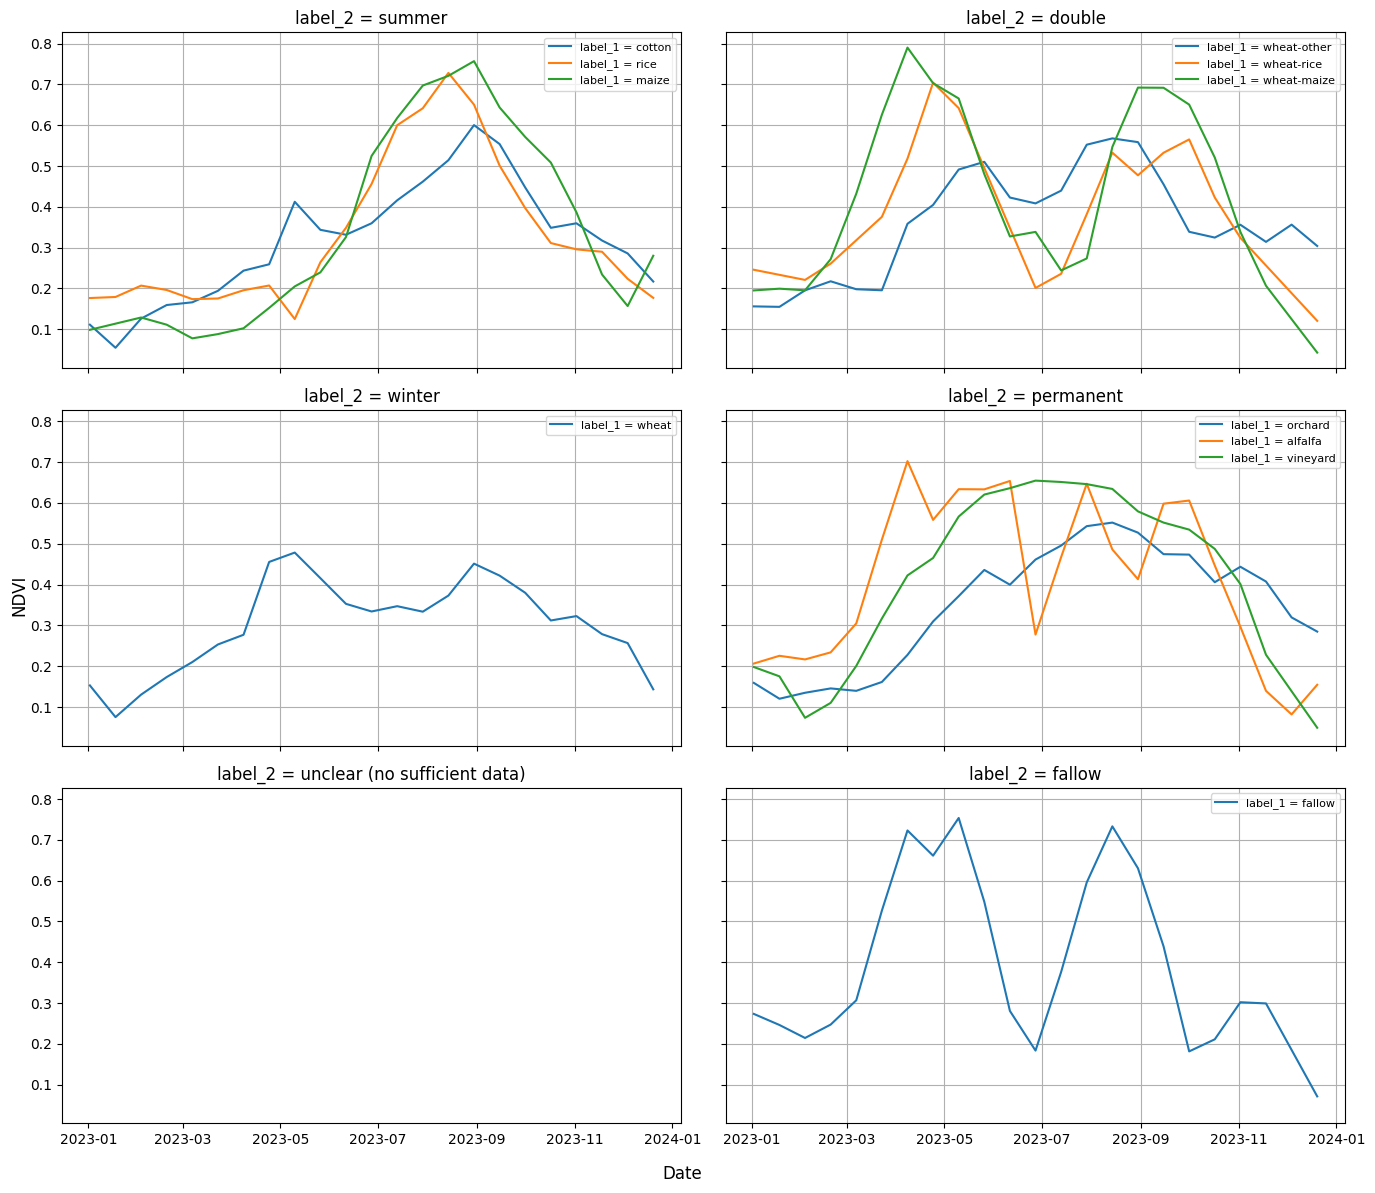

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Keep day columns as strings
day_cols = sorted([c for c in full_gdf.columns if c.isdigit()], key=int)

# Convert Day of Year to actual dates
dates = pd.to_datetime("2023-01-01") + pd.to_timedelta([int(d) for d in day_cols], unit='D')

label2_unique = full_gdf['label_2'].unique()
n_rows, n_cols = 3, 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 12), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten to 1D array for easy indexing

for i, label2 in enumerate(label2_unique):
    ax = axes[i]
    
    group2 = full_gdf[full_gdf['label_2'] == label2]
    
    # Count parcels per label_1 inside this label_2 group
    counts_label1 = group2['label_1'].value_counts()
    
    # Keep only label_1 with at least 50 parcels
    valid_label1 = counts_label1[counts_label1 >= 50].index
    
    if len(valid_label1) == 0:
        ax.set_title(f'label_2 = {label2} (no sufficient data)')
        continue  # skip if no label_1 meets threshold
    
    # Plot one representative per valid label_1
    for label1 in valid_label1:
        subset = group2[group2['label_1'] == label1]
        day_nulls = subset[day_cols].isnull().sum(axis=1)
        representative_row = subset.loc[day_nulls.idxmin()]
        ax.plot(dates, representative_row[day_cols], label=f'label_1 = {label1}')
    
    ax.set_title(f'label_2 = {label2}')
    ax.grid(True)
    ax.legend(fontsize=8)

# Remove unused subplots if any
for j in range(len(label2_unique), n_rows*n_cols):
    fig.delaxes(axes[j])

fig.supxlabel('Date')
fig.supylabel('NDVI')
fig.tight_layout()
plt.show()
